## My Background and Motivation

I was inspired to look more into the problem of healthcare disparities in Chicago because of its importance, both to me personally and to the community at large. I have a background in neuroscience, and I'm also interested in urban and business development. I focused on Chicago specifically because of its proximity to Northwestern’s Evanston campus. Chicago is also one of the largest and most prominent cities in the country, burdened by a long history of redlining and racial segregation. Thus, there is lots to be studied in terms of how healthcare disparities affect Chicago’s neighborhoods.

Crucially, I experienced my first two years of college with pandemic restrictions, so I understand how vital it is that all people have access to high-quality healthcare. As attitudes about the pandemic change and the world moves beyond restrictions, it is important to analyze the healthcare outcomes of local communities based upon current conditions in order to best plan for the future.

## What I aim to answer
1) What is the distribution of primary care clinics across Chicago, the link between neighborhood facility count and health outcomes, and the effect (if any) of population change on healthcare access and outcomes?
- This inquiry explores where and how many healthcare facilities are in Chicago, if facility distribution has any relation to the health outcomes (measured by CCVI Score) of specific neighborhoods of Chicago, and if rate of population change is linked to health outcomes of neighborhoods (categorized by having a high or low number of healthcare facilities.)

2) Do demographic characteristics such as race and socioeconomic status correlate with healthcare access and outcomes?
- This inquiry explores if community characteristics such as the dominant race in the neighborhood and socioeconomic status in Chicago communities affect the community’s overall health and well being. This was done by measuring if the neighborhood is predominantly white or people of color, as well as by comparing specific race categories with indicators of socioeconomic level.


## Data sources
I used three datasets for this project, all sourced from data provided by different departments of the City of Chicago. The first dataset is the CMAP Chicago Community Area Demographic Data (2020), a comprehensive dataset of general demographic data by neighborhood. This dataset provided me with the population change rates and distributions of race/class in each neighborhood that I used in my analysis. The second dataset is the Chicago COVID-19 Vulnerability Index Data (2021), an innovative new dataset that assigns numerical indices to specific indicators of health by neighborhood. The defining statistic of this dataset is the CCVI (Covid-19 Community Vulnerability Index) Score: this is a summary variable of 40 measures of community health and well-being, where a higher score means more neighborhood vulnerability (higher risk). I used the CCVI Score in my analysis as the variable representing health outcomes in a neighborhood. The final dataset is the Chicago Public Health Services List of Community Health Centers (2019), which provided me with the names, addresses, and neighborhoods of all 120 clinics located in Chicago. With manipulation, the dataset provided me with the coordinates of the clinics (to be plotted on a map) as well as the number of healthcare facilities per neighborhood.

The datasets can be found at the below links, listed in order of introduction:

https://datahub.cmap.illinois.gov/dataset/community-data-snapshots-raw-data

https://data.cityofchicago.org/Health-Human-Services/Chicago-COVID-19-Community-Vulnerability-Index-CCV/rqqg-u7zt

https://data.cityofchicago.org/Health-Human-Services/Public-Health-Services-Chicago-Primary-Care-Commun/cjg8-dbka/data

## Potential Stakeholders
This analysis has three target groups: healthcare administrators, city government officials, and real estate developers. These groups collaborate on the construction and maintenance of healthcare facilities across the city, and each group is integral to ensuring that Chicago’s healthcare system functions. The groups must follow a shared agenda in order to change policy regarding the operation of healthcare facilities in Chicago, especially regarding matters of equity in access, so this analysis is aimed at the three groups equally. They can utilize this report’s reccomendations to target investment and development where it is needed most.

The analyses in this report are also relevant to all residents of Chicago, particularly those in historically marginalized groups. It is these communities that are typically most affected by lack of access to healthcare, and this report reveals how this manifests. It could provide community members with crucial insight on how their communities operate and what steps are needed to secure a more equitable future.

## Data quality check / cleaning / preparation 

To create the dataset used in this analysis, I combined three datasets using the neighborhoods in which clinics are located as the data points of intersection. The CMAP and CCVI datasets had the same values on the neighborhood column (labeled GEOG), so they were concatenated without further editing. To match this dataset to the list of community health centers, I grouped the CMAP and CCVI dataset by neighborhood and then concatenated to the larger dataset using an algorithm to match neighborhoods between the datasets by the similarity score of the compared string objects.

During the data preparation process, I created various variables to represent percentages of certain variables. The rate of change in population (as a percentage) was computed using the rate-of-change formula, and the other percentage values (of unemployment and of five race categories) were calculated based on their proportion to the whole. Aside from removing unnecessary characters from some strings, no other cleaning was needed for specific variables in the analysis. There were also no missing values in any of the datasets, so no values in the analysis were imputed.

The following code block shows how the data was manipulated to form the two datasets used for analysis. One dataset has 49 values; it is grouped by neighborhood. The other dataset has 120 values; it is grouped by facility. Printed are the distributions of all variables of interest in the datasets alongside proof that no values are missing from any measured variable, as well as a list of all the neighborhoods in the dataset.

In [2]:
import pandas as pd
from difflib import SequenceMatcher
cmap_data = pd.read_csv('ReferenceCCAProfiles20162020.csv', index_col = 1)
relevant_columns = ['2010_POP', '2020_POP', 'MED_AGE', 'WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER', 'IN_LBFRC', 'UNEMP', 'HS', 'BACH', 'MEDINC', 'INCPERCAP', 'MED_HA', 'MED_RENT', 'TRANSIT_HIGH_PCT', 'WALKABLE_HIGH_PCT', 'OPEN_SPACE_PER_1000', 'TOT_ACRES', 'NATIVE', 'LING_ISO']
cmap_data = cmap_data.loc[:, relevant_columns].rename({'OTHER' : "OTHER_RACE", 'IN_LBFRC' :'IN_LABORFORCE', 'MED_HA' : 'MED_HOUSEAGE', 'LING_ISO' : 'NON_ENGLISH_HOME'}, axis=1)
cmap_data['POP_CHANGEPCT'] = (cmap_data['2020_POP'] - cmap_data['2010_POP']) / cmap_data['2010_POP'] * 100
cmap_data['UNEMPRATE'] = cmap_data['UNEMP'] / cmap_data['IN_LABORFORCE'] * 100
cmap_data['%WHITE'] = cmap_data['WHITE'] / cmap_data['2020_POP'] * 100
cmap_data['%HISP'] = cmap_data['HISP'] / cmap_data['2020_POP'] * 100
cmap_data['%BLACK'] = cmap_data['BLACK'] / cmap_data['2020_POP'] * 100
cmap_data['%ASIAN'] = cmap_data['ASIAN'] / cmap_data['2020_POP'] * 100
cmap_data['%OTHER_RACE'] = cmap_data['OTHER_RACE'] / cmap_data['2020_POP'] * 100
cmap_data.loc[cmap_data['%WHITE'] > cmap_data['%ASIAN'], 'WHITEDOM?'] = "White-Dominant"
cmap_data.loc[cmap_data['%WHITE'] > cmap_data['%HISP'], 'WHITEDOM?'] = "White-Dominant"
cmap_data.loc[cmap_data['%WHITE'] > cmap_data['%BLACK'], 'WHITEDOM?'] = "White-Dominant"
cmap_data.loc[cmap_data['%WHITE'] > cmap_data['%OTHER_RACE'], 'WHITEDOM?'] = "White-Dominant"
cmap_data.loc[cmap_data['%WHITE'] < cmap_data['%ASIAN'], 'WHITEDOM?'] = "POC-Dominant"
cmap_data.loc[cmap_data['%WHITE'] < cmap_data['%HISP'], 'WHITEDOM?'] = "POC-Dominant"
cmap_data.loc[cmap_data['%WHITE'] < cmap_data['%BLACK'], 'WHITEDOM?'] = "POC-Dominant"
cmap_data.loc[cmap_data['%WHITE'] < cmap_data['%OTHER_RACE'], 'WHITEDOM?'] = "POC-Dominant"
ccvi_data = pd.read_csv('Chicago_COVID-19_Community_Vulnerability_Index__CCVI__-_CA_Only.csv')
ccvi_drop = ccvi_data.iloc[:, [0, 1, -1]].columns.to_list()
ccvi_data = ccvi_data.rename({'Community Area Name': 'GEOG'}, axis = 1).drop(ccvi_drop, axis = 1)
ccvi_data['GEOG'] = ccvi_data['GEOG'].apply(lambda x: x[:-1] if x[-1].isalnum() == False else 'The Loop' if x == 'Loop' else x)
combined_data = ccvi_data.join(cmap_data, on='GEOG', how='inner', sort = True).reset_index().drop('index', axis = 1)
combined_data.isnull().sum() #returns 0 for all values
clinic_data = pd.read_csv('Public_Health_Services-_Chicago_Primary_Care_Community_Health_Centers.csv').iloc[:, [0, 1, -1]].rename(columns = {'Community Area (#)' : 'GEOG'})
clinic_data['GEOG'] = clinic_data['GEOG'].apply(lambda x: x[:-4].title())
def similarity(a):
    combined_data["Similarity Score"] = combined_data.GEOG.apply(lambda x: SequenceMatcher(None, a, x).ratio())
    return combined_data.iloc[combined_data["Similarity Score"].argmax()]
updated_dataframe = clinic_data.GEOG.apply(similarity).rename(columns = {'GEOG' : 'Matched GEOG'})
all_data = pd.concat((clinic_data[['Facility', 'Address']], updated_dataframe), axis = 1)
all_data.isnull().sum() #returns 0 for all values
grouped_data = pd.concat((all_data.groupby('Matched GEOG').mean().reset_index(), all_data.groupby('Matched GEOG')['Facility'].count().reset_index()), axis = 1)
grouped_data = grouped_data.loc[:,~grouped_data.T.duplicated(keep='first')]
all_data['Coordinates'] = all_data.Address.apply(lambda x: x[x.find('('):])
all_data['Latitude'] = all_data['Coordinates'].apply(lambda x: x[1: x.find(',')]).astype(float)
all_data['Longitude'] = all_data['Coordinates'].apply(lambda x: x[x.find(' ') :-1]).astype(float)
display_data = pd.concat((grouped_data[['CCVI Score', 'POP_CHANGEPCT', '%WHITE', '%HISP', '%BLACK', '%ASIAN', '%OTHER_RACE', 'Rank - Socioeconomic Status', 'UNEMPRATE', 'MEDINC', 'Facility']].describe(), all_data[['Latitude', 'Longitude']].describe()), axis = 1)
print('Data Distributions: \n',display_data)
neighborhoodnames = grouped_data[['Matched GEOG']].values.tolist()
print('Confirmation of no null values:\n', pd.concat([grouped_data[['CCVI Score', 'POP_CHANGEPCT', '%WHITE', '%HISP', '%BLACK', '%ASIAN', '%OTHER_RACE','Rank - Socioeconomic Status', 'UNEMPRATE', 'MEDINC', 'Facility', 'Matched GEOG']].isnull().sum(), all_data[['Latitude', 'Longitude']].isnull().sum()], axis = 0))
print('Neighborhoods in analysis:\n', neighborhoodnames)

Data Distributions: 
        CCVI Score  POP_CHANGEPCT     %WHITE      %HISP      %BLACK     %ASIAN  \
count   49.000000      49.000000  49.000000  49.000000   49.000000  49.000000   
mean    38.297959       2.378547  24.090704  27.339488   38.742876   5.266060   
std     15.795444      10.403650  24.423186  28.596204   37.778635   6.670371   
min      4.000000     -20.503034   0.816625   1.342230    0.679569   0.000000   
25%     27.700000      -3.469112   3.969255   3.833999    4.176613   0.330375   
50%     41.300000       1.158371  13.583897  15.583575   20.644695   2.219776   
75%     50.100000       7.200245  44.198126  50.753607   75.783009   7.212166   
max     59.700000      34.618981  78.926687  89.543580  102.621185  28.713182   

       %OTHER_RACE  Rank - Socioeconomic Status  UNEMPRATE         MEDINC  \
count    49.000000                    49.000000  49.000000      49.000000   
mean      2.264359                    42.020408  11.278119   55648.602858   
std       1.66656

## Exploratory Data Analysis

The primary inquiry I aimed to address was to determine the geographical distribution of healthcare clinics in the Chicago area. Instead of simply presenting a table of neighborhood names and corresponding clinic addresses, I sought to provide an interactive and compelling visualization of the data through the use of a map. I incorporated the latitude and longitude pairs provided in the Chicago Public Health dataset. After cleaning the strings containing the coordinate data with a concise three-line code, I stacked the coordinate pairs together using NumPy. This scatterplot-map approach proved to be effective, as the resulting visualization clearly displays the distribution of clinics throughout the city.

I encountered some technical challenges while creating the visualization, including difficulty in properly rendering the image without extensive adjustments to the photo dimensions, visible dimensions, and scatterplot limits. Despite the need for trial and error, the final product successfully conveys the distribution of clinics in Chicago as intended.

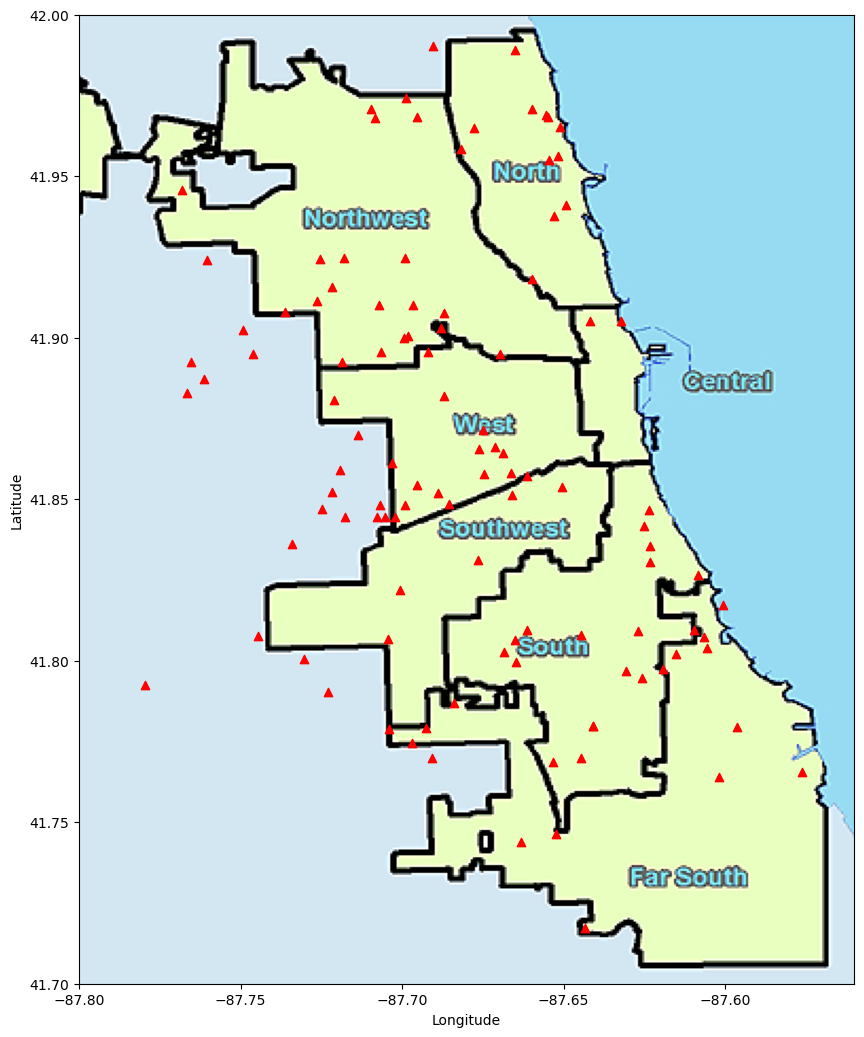

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
coordinates = np.stack((all_data['Latitude'].to_numpy(), all_data['Longitude'].to_numpy()), axis = 1)
all_data.Address = all_data.Address.apply(lambda x: x[: x.find('\n')])
def chicago_viz():
    img = plt.imread("City_regions-1.jpeg")
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 20)
    ax.imshow(img, extent=[-87.8, -87.56, 41.7, 42])
    plt.scatter(y = coordinates[:,0], x = coordinates[:,1], marker='^', c='red')
    plt.xlim(-87.8, -87.56)
    plt.ylim(41.7,42)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
chicago_viz()

For my second research question, I aimed to explore the potential relationship between clinic location and health outcomes. Specifically, I hypothesized that neighborhoods with a higher number of clinics would have better health outcomes, as measured by the CCVI Score. To visualize this relationship, I employed a scatterplot with attached histograms, which I discovered to be a useful method for displaying joint distributions [1]. Given that I utilized pre-cleaned variables and a pre-existing template from a repository, I encountered no issues during the data visualization process.

However, upon examining the resulting scatterplot, I was perplexed by the absence of a clear relationship between the number of clinics in a neighborhood and health outcomes. In fact, many neighborhoods with low facility counts appeared to have high CCVI scores, as indicated by the individual distributions. A numerical correlation analysis further confirmed this weak correlation (with a value of 0.158) between the two variables, which even suggested an inverse relationship.

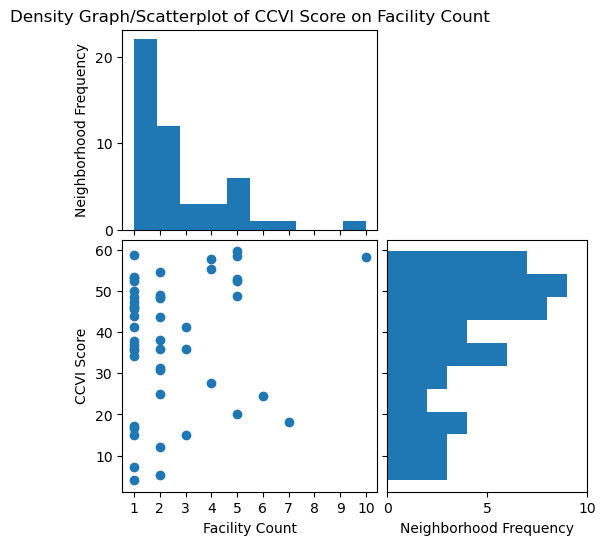

Correlation Between Facility Count and CCVI Score: 0.158


In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x = grouped_data['Facility'], y = grouped_data['CCVI Score'])
divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 2, pad=0.1, sharey=ax)
ax.set_xticks(np.arange(1, 11, step = 1))
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histx.hist(x = grouped_data['Facility'])
ax_histy.hist(x = grouped_data['CCVI Score'], orientation = 'horizontal')
ax_histx.set_yticks([0, 10, 20])
ax_histy.set_xticks([0, 5, 10])
ax_histx.set_ylabel('Neighborhood Frequency')
ax_histy.set_xlabel('Neighborhood Frequency')
ax.set_ylabel('CCVI Score')
ax.set_xlabel('Facility Count')
ax_histx.set_title('Density Graph/Scatterplot of CCVI Score on Facility Count')
plt.show()
print('Correlation Between Facility Count and CCVI Score:', round(grouped_data['Facility'].corr(grouped_data['CCVI Score']), 3))

To address my third inquiry, I sought to investigate whether changes in population over time had any discernible impact on healthcare outcomes. Although the majority of variables in the datasets pertained only to the present period, the Population Change metric enabled me to track demographic trends across the Chicago Community Areas from 2010 to 2020. To manage the numerous Population Change values, I divided neighborhoods into four quartile-based bins. Additionally, I split the facility count metric into two bins to examine any possible link between clinic count and population demographics. By employing Seaborn, I visualized the mean CCVI Score of each neighborhood group against the population change quartiles, with facility count serving as the hue. The resulting visualization satisfactorily displayed my three variables of interest and required no further manipulation. My primary conclusion is that a positive population growth is associated with a lower CCVI Score, suggesting a positive relationship between population growth and healthcare outcomes (where higher growth signifies a better score), although the graphical display appears to indicate an inverse relationship due to the nature of the variables. Conversely, there appears to be no significant relationship between facility count and population change, implying that population growth does not heavily influence the number of clinics operating in a given neighborhood.

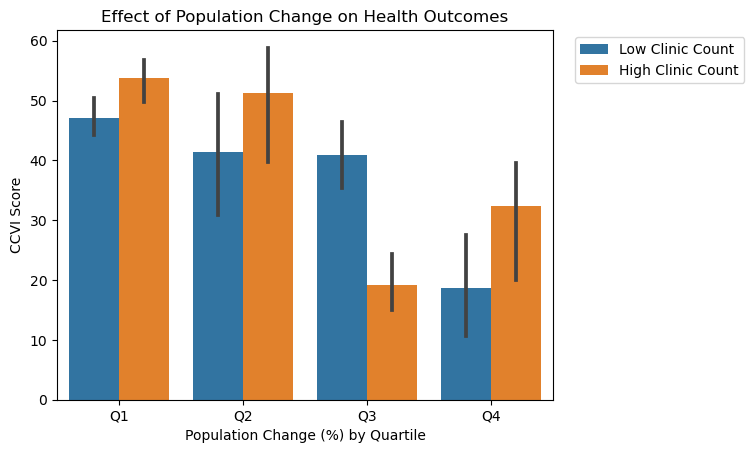

In [5]:
grouped_data['popchange_bin'] = pd.qcut(grouped_data['POP_CHANGEPCT'],4,labels = ['Q1','Q2','Q3', 'Q4'])
grouped_data['facilities_bin'] = pd.qcut(grouped_data['Facility'],2,labels = ['Low Clinic Count', 'High Clinic Count'])
ax2 = sns.barplot(data = grouped_data, x = 'popchange_bin', y = 'CCVI Score', hue = 'facilities_bin')
ax2.set_xlabel('Population Change (%) by Quartile')
ax2.set_title('Effect of Population Change on Health Outcomes')
plt.legend(bbox_to_anchor = (1.4, 1))
plt.show()

Next, I focused on two primary characteristics of Chicago communities: the predominant racial demographics of the neighborhood and its association with the CCVI score, as well as the average number of healthcare facilities in neighborhoods dominated by people of color (POC) versus those dominated by White residents, and how indicators of socioeconomic status relate to the CCVI score of the community.

In the first part of this analysis, I sought to examine the relationship between the percentage of race in a neighborhood and the CCVI score. This was of particular interest given Chicago's history of redlining and contemporary racial segregation. Initially, I intended to create a stacked bar plot of the number of healthcare facilities in each neighborhood, stacked with the population percent of each race. However, I determined that this approach would be overly complicated and opted instead to create five scatter plots to clearly illustrate the specific relationships between each race and the CCVI score. To accomplish this, I created new columns that calculated the percentage of the White, Black, Hispanic, Asian, and Other races based on the total and racial population of each Chicago neighborhood. As expected, I found that neighborhoods with predominantly Black and Hispanic populations had higher CCVI scores, indicating greater vulnerability and lower levels of neighborhood health and well-being. This aligns with the unfortunate reality that communities predominantly composed of these races are often underserved and were significantly impacted by the COVID-19 pandemic.

I also briefly examined the average number of healthcare facilities in POC neighborhoods (including Asian, Black, Hispanic, and Other races) versus White neighborhoods. On average, White neighborhoods had slightly more healthcare facilities than POC neighborhoods. However, it is important to note that the "Other Race" category had a very low population percentage in all Chicago neighborhoods (<5%), so the data for this group may be less meaningful than the visualizations suggest. I also included Asian and Other Race within the POC category, even though they have a similar relationship to the CCVI score as White neighborhoods, as these categories are still considered people of color.

Overall, the findings and data analysis methods were successful in clearly illustrating the relationships between racial demographics, CCVI scores, and the number of healthcare facilities in each neighborhood.

Text(0, 0.5, 'CCVI Score')

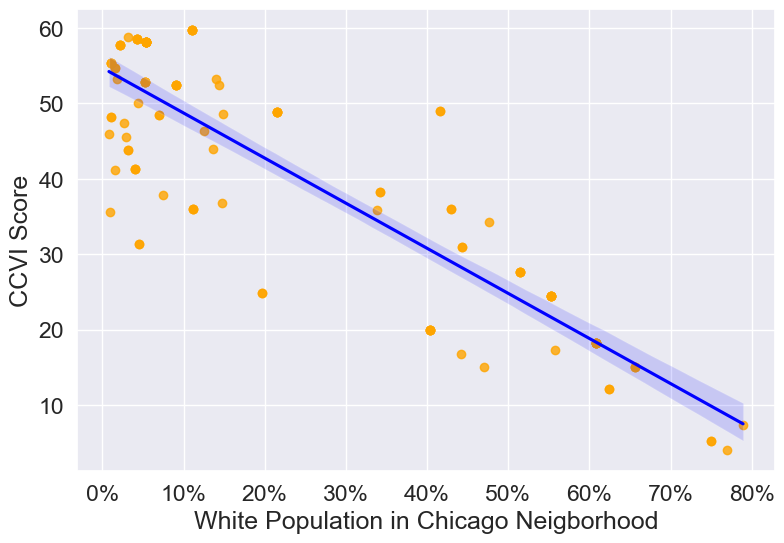

In [6]:
all_data.loc[all_data['CCVI Category'] == "HIGH", 'CCVI_Num'] = 3
all_data.loc[all_data['CCVI Category'] == "MEDIUM", 'CCVI_Num'] = 2
all_data.loc[all_data['CCVI Category'] == "LOW", 'CCVI_Num'] = 1

#Scatterplot and trendline with seaborn
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax1=sns.regplot(x = '%WHITE', y = 'CCVI Score', data = all_data, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax1.xaxis.set_major_formatter('{x:,.0f}%')
ax1.set_xlabel('White Population in Chicago Neigborhood')
ax1.set_ylabel('CCVI Score')

Text(0, 0.5, 'CCVI Score')

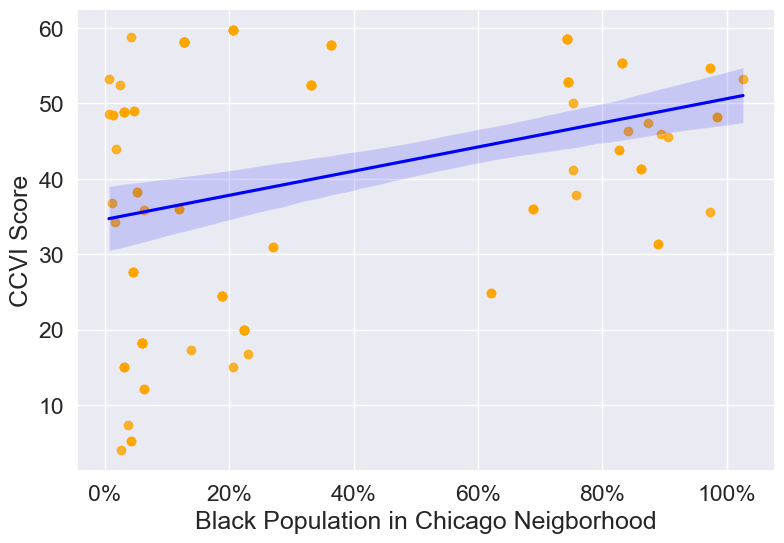

In [7]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax2=sns.regplot(x = '%BLACK', y = 'CCVI Score', data = all_data,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax2.xaxis.set_major_formatter('{x:,.0f}%')
ax2.set_xlabel('Black Population in Chicago Neigborhood')
ax2.set_ylabel('CCVI Score')

Text(0, 0.5, 'CCVI Score')

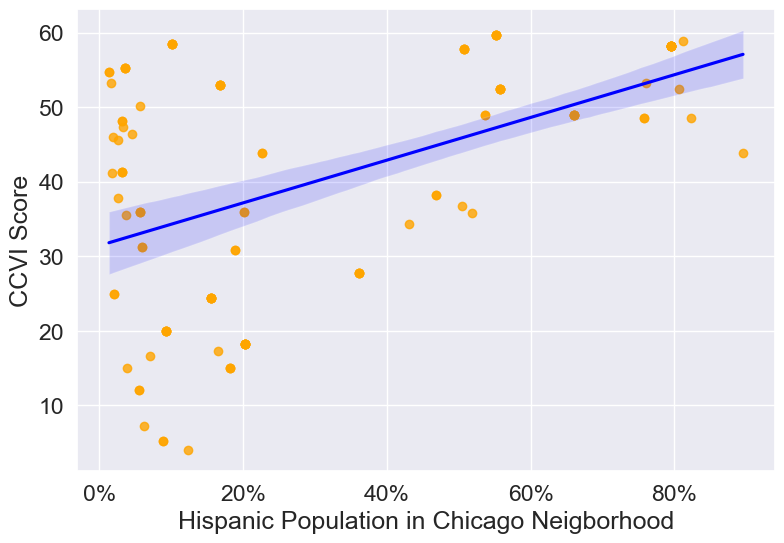

In [8]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax3=sns.regplot(x = '%HISP', y = 'CCVI Score', data = all_data,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax3.xaxis.set_major_formatter('{x:,.0f}%')
ax3.set_xlabel('Hispanic Population in Chicago Neigborhood')
ax3.set_ylabel('CCVI Score')

Text(0, 0.5, 'CCVI Score')

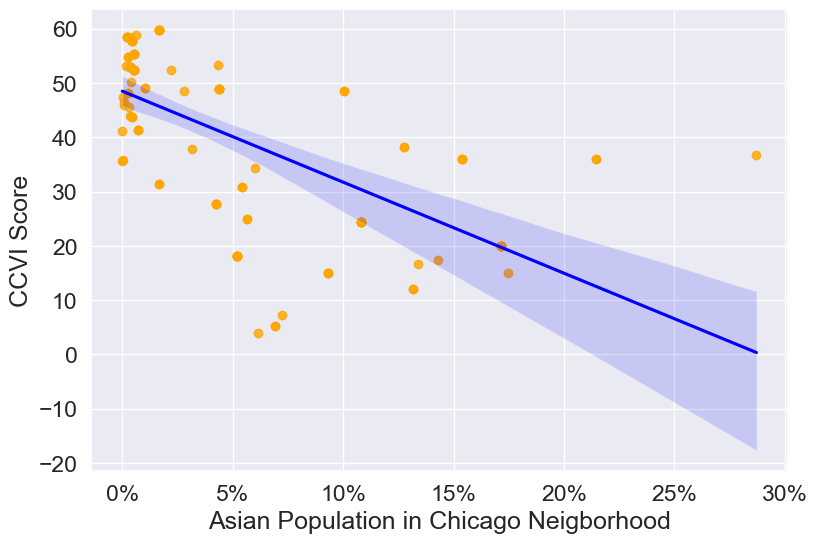

In [9]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax4=sns.regplot(x = '%ASIAN', y = 'CCVI Score', data = all_data,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax4.xaxis.set_major_formatter('{x:,.0f}%')
ax4.set_xlabel('Asian Population in Chicago Neigborhood')
ax4.set_ylabel('CCVI Score')

Text(0, 0.5, 'CCVI Score')

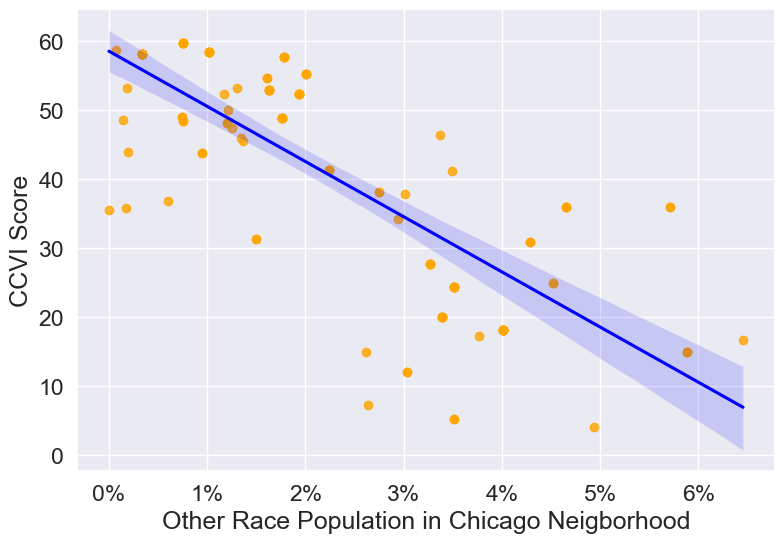

In [10]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.5)
ax5=sns.regplot(x = '%OTHER_RACE', y = 'CCVI Score', data = all_data,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax5.xaxis.set_major_formatter('{x:,.0f}%')
ax5.set_xlabel('Other Race Population in Chicago Neigborhood')
ax5.set_ylabel('CCVI Score')

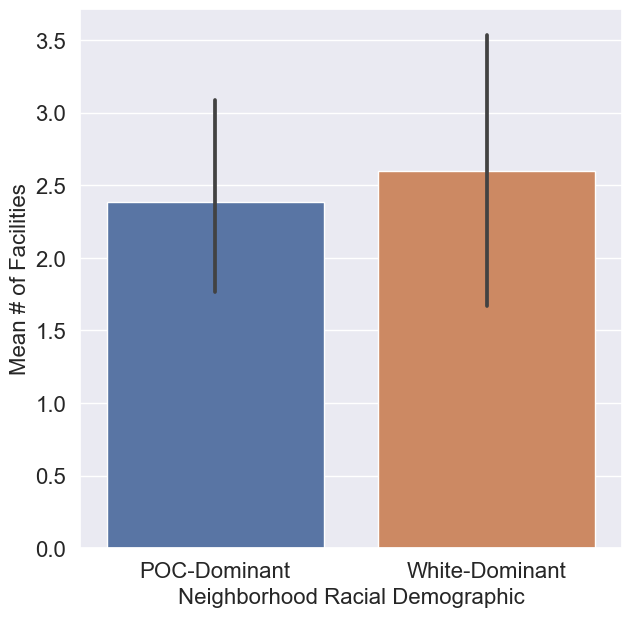

In [11]:
plt.rcParams["figure.figsize"] = (7,7)
sns.barplot(x = 'WHITEDOM?' ,y = all_data['Matched GEOG'].value_counts(), data = cmap_data)
plt.xlabel('Neighborhood Racial Demographic', fontsize=16)
plt.ylabel('Mean # of Facilities', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In the second part of my analysis, I examined various socioeconomic indicators of Chicago neighborhoods, including median income, unemployment rate, and socioeconomic status rank. Given the interconnectedness of these variables with access to healthcare, I aimed to investigate their relationship with the CCVI Score. While the socioeconomic status rank alone may not fully reflect a neighborhood's economic standing, incorporating additional metrics such as unemployment rate and median income can provide a more comprehensive understanding of access to consistent income. To visualize these relationships, I created a pairplot that displays the pairwise relationships between the three variables and the CCVI Score. Based on my hypotheses, I expected to find that neighborhoods with lower median income, higher unemployment rates, and lower socioeconomic ranks would exhibit higher CCVI Scores.

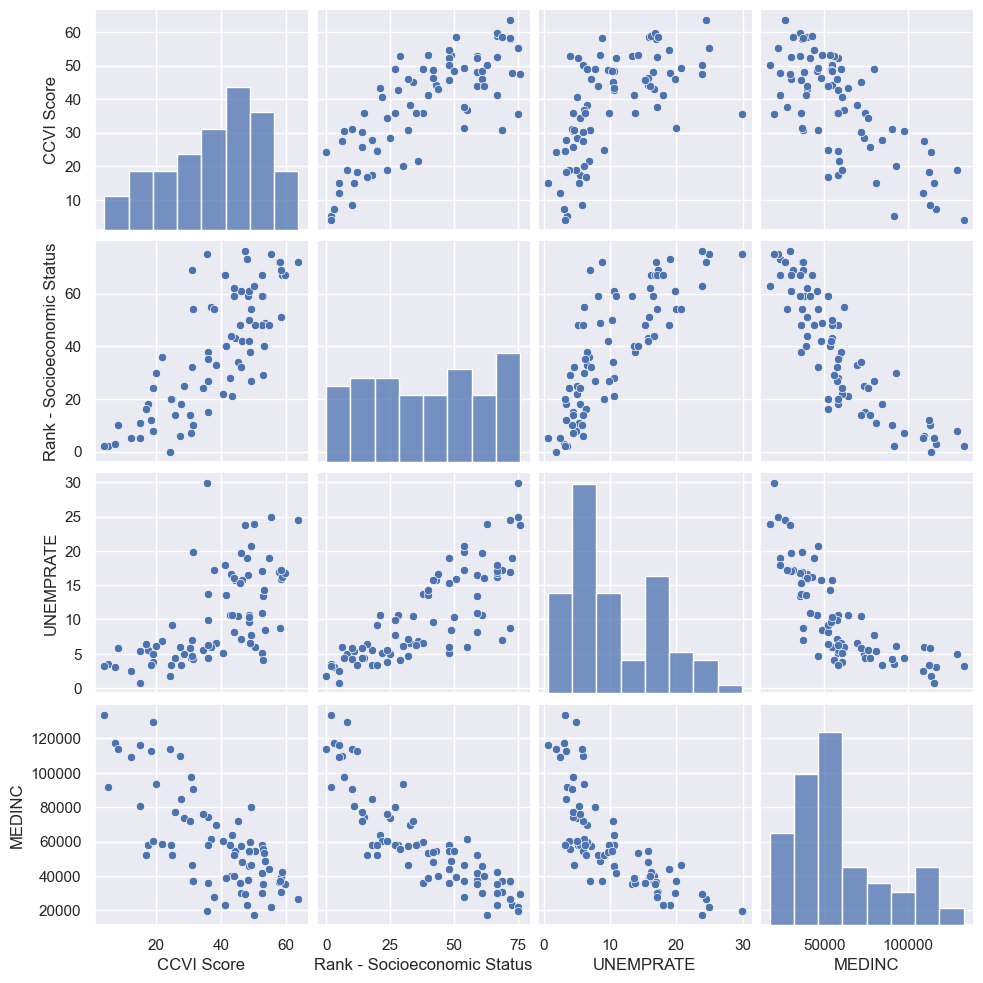

In [12]:
combined_simple = combined_data[['CCVI Score', 'Rank - Socioeconomic Status', 'UNEMPRATE', 'MEDINC']].copy()
sns.set(rc={'figure.figsize':(6,5)})
sns.pairplot(combined_simple)
plt.show()

## Potential Next Steps

The analysis reveals that facility count in a neighborhood is not correlated with health outcomes, but it remains to be seen if this is true on a more macro level. The map displays visually that certain regions of Chicago have deficiencies in clinic count in comparison to others, but additional analysis is needed to see if the mean CCVI Score of a region, presumably a collection of similar neighborhoods, is correlated to the total clinic count of the region. Additionally, there exists a possibility that outliers in the dataset skewed the calculation of the correlation between CCVI Score and neighborhood health outcomes. In particular, South Lawndale, a neighborhood with a very high CCVI Score, has 10 clinics, three more than the count in the neighborhood with the second most clinics. This value could have had an outsized effect on the data analysis – further analysis, with this point removed, could reveal insights that this report does not.

## Final thoughts and conclusion

Based on my analyses, it is apparent that significant gaps in health outcomes exist in Chicago, and some underlying factors that contribute to these disparities have been identified. The data revealed that there are substantial areas in the Far South Side and Far Northwest Sides of Chicago that lack healthcare facilities. However, the correlation between the number of healthcare facilities and the health outcomes of a Chicago neighborhood was found to be insignificant. This suggests that the number of healthcare facilities alone does not necessarily indicate positive health outcomes. While healthcare facilities are essential for improving health outcomes, the quality of care provided is equally important, if not more so. Constructing a healthcare facility without equipping it with quality care providers and resources will not adequately serve the community it is intended for.

The analyses also identified areas that require high-quality facilities, especially those with high population growth rates. It is crucial to invest in communities with high population growth rates to provide adequate healthcare for the increasing population. Furthermore, neighborhoods with high percentages of Hispanic, Black, and low-socioeconomic status residents require quality healthcare facilities, as there is a significant disparity in the number of facilities in predominantly people of color neighborhoods. These findings underscore the urgent need for quality care in these specific Chicago communities, which were significantly affected during the pandemic.

In light of these results, it is vital that all communities are adequately prepared for any present and future health crises. This work provides a starting point for community-based investments towards achieving equitable healthcare access and outcomes in Chicago. 

## Recommendations to stakeholder(s)

Healthcare accessibility for all requires hospital administrators, government officials, and real estate developers to redefine the concept of access. My analysis reveals that the correlation between the number of healthcare facilities in a neighborhood and health outcomes is statistically insignificant. However, map visualizations indicate that certain areas, such as the Far South Side and Far Northwest Side, lack adequate healthcare centers. Achieving equitable healthcare access requires a more even distribution of healthcare centers across the city, as well as a focus on improving the capacity of existing facilities. My report highlights several demographics that should be prioritized for resource allocation, such as neighborhoods with population decline or stagnation and those with higher percentages of Black or Hispanic residents. Additionally, neighborhoods with poorer socioeconomic indicators, such as low median income and high unemployment rates, require investment in healthcare infrastructure. Investing in healthcare centers can have a significant impact on economic development and prosperity in the long term.

While I utilized the most recent available data, stakeholders may benefit from analyzing regional trends instead of more granular neighborhood data to make more informed decisions.

## References {-}

[1] Scatter Plot with Histograms — Matplotlib 3.6.2 Documentation. https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html. Accessed 4 Dec. 2022.

[2] The Role of Hospitals in Community and Economic Development | Fels Institute of Government. https://www.fels.upenn.edu/recap/posts/1071. Accessed 4 Dec. 2022.